<a href="https://colab.research.google.com/github/LagosJA/Mineria_de_Datos/blob/main/Regresion_Lineal_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv("Fish.csv")

Importar librerias y los datos

In [ ]:
print(df.head())
print(df.shape)

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
(159, 7)


Verificamos que no hayan datos nulos.

In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

No hay datos nulos, proseguimos.

In [ ]:
perch=df[df['Species']=='Perch']
perch.shape

(56, 7)

Como perch se extrajo de otra base de datos, los elementos conservan los indices de la base original, queremos que empiecen desde cero asi que usamos reset_index().

El problema es que los indices anteriores se quedan guardados en una nueva columna llamada index, asi que la eliminamos.

In [ ]:
perch=perch.drop("Species",axis=1)
perch=perch.reset_index()

In [ ]:
perch=perch.drop("index",axis=1)
perch.head()

,Weight,Length1,Length2,Length3,Height,Width
0,5.9,7.5,8.4,8.8,2.1120,1.4080
1,32.0,12.5,13.7,14.7,3.5280,1.9992
2,40.0,13.8,15.0,16.0,3.8240,2.4320
3,51.5,15.0,16.2,17.2,4.5924,2.6316
4,70.0,15.7,17.4,18.5,4.5880,2.9415


## Análisis Visual

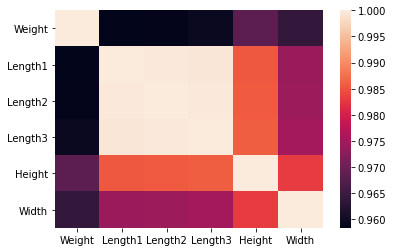

In [ ]:
corr = perch.corr(method='pearson')
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)

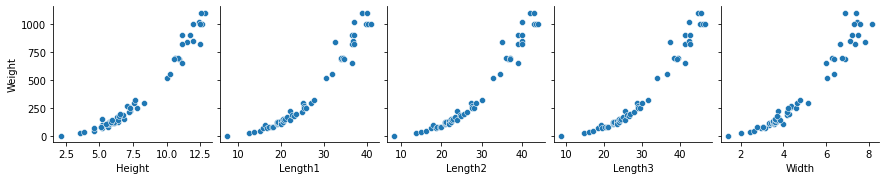

In [ ]:
sns.pairplot(perch, x_vars=['Height','Length1', 'Length2', 'Length3', 'Width'], y_vars='Weight')

## Programación de la Regresión Lineal

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return(vif)

In [ ]:
# Fit the model
y = perch["Weight"]
x1 = perch["Length1"]
x2 = perch["Length2"]
x3 = perch["Length3"]
x4 = perch["Height"]
x5 = perch["Width"]
x42=perch["Height"]**2
d = {"x1": x1, "x2": x2, "x3": x3,"x4":x4,"x5":x5}
X=pd.DataFrame(d)

In [ ]:
model1=build_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           7.60e-30
Time:                        19:48:50   Log-Likelihood:                -326.45
No. Observations:                  56   AIC:                             664.9
Df Residuals:                      50   BIC:                             677.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -556.5865     60.663     -9.175      0.0

Del resumen del modelo podemos obtener el ajuste, los coeficientes y un p-valor para una prueba de significancia.

In [ ]:
checkVIF(model1)

,Variables,VIF
0,const,27.16
1,x1,1780.08
2,x2,4626.41
3,x3,2376.77
4,x4,54.04
5,x5,30.86


Hay graves problemas de multicolinealidad, por lo que decidimos usar el modelo de regresión simple, es decir, con una sola variable.

In [ ]:
d1 = {"x4":x4}
X_1=pd.DataFrame(d1)
mod2=build_model(X_1,y)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     815.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.92e-34
Time:                        20:18:55   Log-Likelihood:                -328.82
No. Observations:                  56   AIC:                             661.6
Df Residuals:                      54   BIC:                             665.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -537.3275     34.260    -15.684      0.0

Graficamos nuestro modelo lineal.

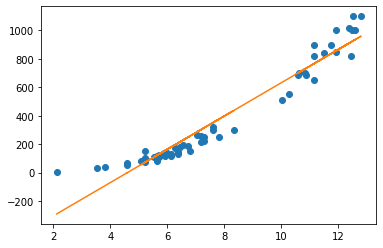

In [ ]:
plt.plot(x4, y, 'o')
m, b = np.polyfit(x4, y, 1)
plt.plot(x4, m*x4 + b)

Si creamos una nueva columna que contenga los cuadrados de otra, podemos hacer un modelo polinomial, en este caso cuadrático.

In [ ]:
x4_2=perch["Height"]**2
d2 = {"x4":x4, "x4_2":x4_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1395.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.47e-46
Time:                        23:37:04   Log-Likelihood:                -295.11
No. Observations:                  56   AIC:                             596.2
Df Residuals:                      53   BIC:                             602.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.4902     59.731      1.548      0.1

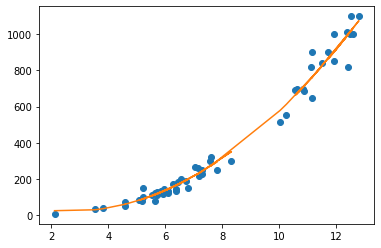

In [ ]:
plt.plot(x4, y, 'o')
a,b,c = np.polyfit(x4, y, 2)
plt.plot(x4, a*x4*x4 +b*x4 + c)

Proseguimos a hacer predicciones/estimaciones en este caso cuanto es el peso de una percha con altura de 9.5 cm.

In [ ]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,9.5,9.5**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([501.23791418])